# 取得頁面圖片
可能有些網站不適用這個程式碼的頁面擷取

In [2]:
import selenium.webdriver.chrome.webdriver
import time, os
from PIL import Image

def chrome_take_full_page_screenshot(browser, file):

    browser.maximize_window()    
    time.sleep(0.2)

    total_width = browser.execute_script("return document.body.offsetWidth")
    total_height = browser.execute_script("return document.body.parentNode.scrollHeight")

    viewport_width = browser.execute_script("return document.body.clientWidth")
    viewport_height = browser.execute_script("return window.innerHeight")

    rectangles = []

    i = 0
    while i < total_height:
        ii = 0
        top_height = i + viewport_height

        if top_height > total_height:
            top_height = total_height

        while ii < total_width:
            top_width = ii + viewport_width

            if top_width > total_width:
                top_width = total_width

            rectangles.append((ii,i,top_width,top_height))
            ii = ii + viewport_width
        i = i + viewport_height

    stitched_image = Image.new('RGB', (total_width, total_height))
    previous = None
    part = 0    
    cache_id = 1
    for rectangle in rectangles:
        if not previous is None:
            browser.execute_script("window.scrollTo({0}, {1})".format(rectangle[0], rectangle[1]))
            time.sleep(0.2)
    
        file_name = "scroll_{0}_part_{1}.png".format(cache_id, part)

        browser.get_screenshot_as_file(file_name)

        screenshot = Image.open(file_name)

        if rectangle[1] + viewport_height > total_height:
            offset = (rectangle[0], total_height - viewport_height)
        else:
            offset = (rectangle[0], rectangle[1])
        stitched_image.paste(screenshot, offset)

        del screenshot

        os.remove(file_name)

        part = part + 1
        previous = rectangle

    stitched_image.save(file)

        
chrome_driver = 'C:/anaconda/chromedriver.exe' #驅動路徑
browser = selenium.webdriver.chrome.webdriver.WebDriver(chrome_driver)
browser.get("https://law.moj.gov.tw/LawClass/LawAll.aspx?pcode=A0000001") #擷取網址
chrome_take_full_page_screenshot(browser, 'C:/anaconda/Fireregulations/img.png') #圖片儲存路徑

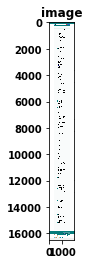

In [7]:
import matplotlib.pyplot as plt 
img = Image.open('C:/anaconda/Fireregulations/img.png')
# img.show() #視窗開圖

plt.imshow(img)
plt.axis('on') # 關掉坐標軸為 off
plt.title('image') # 圖像題目
plt.show()

In [8]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000 #如果圖片pixels很大 設定高一點

url="https://law.moj.gov.tw/LawClass/LawAll.aspx?pcode=A0000001"
driver=webdriver.Chrome("C:/anaconda/chromedriver.exe") #驅動 路徑請設定自己的檔案路徑
driver.get(url)
driver.maximize_window()

sleep(0.3)

content = driver.find_element(By.XPATH, '//*[@id="pnLawFla"]/div/div[165]') #元素位置 #例如：憲法第146條


driver.execute_script("arguments[0].scrollIntoView();", content) #滾動到元素

sleep(0.3)


#取得元素尺寸大小
left=content.location['x']
top=content.location['y']
right=content.location['x'] + content.size['width']
bottom=content.location['y'] + content.size['height']


img=Image.open("C:/anaconda/Fireregulations/img.png") #開啟整頁圖片
img2=img.crop((left,top,right,bottom)) #切圖
img2.save('C:/anaconda/Fireregulations/crop.png') #切圖儲存

# print(left)
# print(top)
# print(right)
# print(bottom)

driver.close()

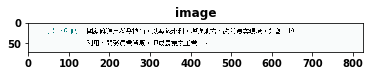

In [9]:
import matplotlib.pyplot as plt 
img = Image.open('C:/anaconda/Fireregulations/crop.png')
# img.show() #視窗開圖

plt.imshow(img)
plt.axis('on') # 關掉坐標軸為 off
plt.title('image') # 圖像題目
plt.show()